In [1]:
# https://github.com/albumentations-team/albumentations
# Augmentacja danych to proces generowania różnorodnych wariantów danych treningowych poprzez wprowadzanie różnych 
# transformacji do oryginalnych przykładów. W kontekście obrazów może to obejmować operacje takie jak obracanie, 
# skalowanie, przycinanie, zmiana jasności i kontrastu, dodawanie szumu, zmiana odcieni kolorów itp. 
# Augmentacja jest szczególnie przydatna, gdy masz ograniczoną ilość danych treningowych, ponieważ pomaga stworzyć 
# różnorodność przykładów, co może poprawić zdolność modelu do generalizacji.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import albumentations as A
import cv2 as cv

from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 0 T-shirt/top


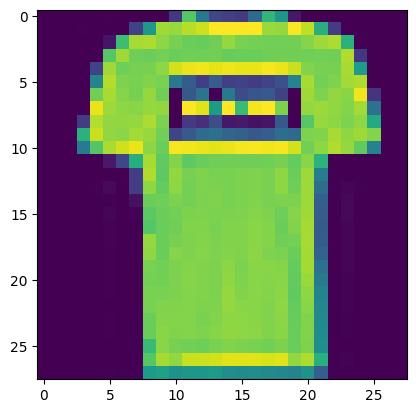

In [5]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 1
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [8]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [9]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
from keras.callbacks import ModelCheckpoint

model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid))

Epoch 1/10
860/860 [==============================] - 45s 51ms/step - loss: 0.6018 - accuracy: 0.7779 - val_loss: 0.3697 - val_accuracy: 0.8684
Epoch 2/10
860/860 [==============================] - 46s 54ms/step - loss: 0.4080 - accuracy: 0.8516 - val_loss: 0.3288 - val_accuracy: 0.8820
Epoch 3/10
860/860 [==============================] - 52s 60ms/step - loss: 0.3697 - accuracy: 0.8649 - val_loss: 0.2938 - val_accuracy: 0.8946
Epoch 4/10
860/860 [==============================] - 56s 65ms/step - loss: 0.3406 - accuracy: 0.8750 - val_loss: 0.2787 - val_accuracy: 0.8978
Epoch 5/10
860/860 [==============================] - 53s 62ms/step - loss: 0.3230 - accuracy: 0.8810 - val_loss: 0.2647 - val_accuracy: 0.9008
Epoch 6/10
860/860 [==============================] - 52s 61ms/step - loss: 0.3060 - accuracy: 0.8877 - val_loss: 0.2605 - val_accuracy: 0.9030
Epoch 7/10
860/860 [==============================] - 48s 56ms/step - loss: 0.2933 - accuracy: 0.8919 - val_loss: 0.2441 - val_accuracy: